In [1]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

In [9]:
dirname = os.path.abspath(os.curdir)

data = pd.read_csv(path.join(os.sep, dirname, 'Radioactivity in the ground at 2 hourly intervals over one year July 2.csv'), index_col=0)

print(data.head())

      dose_rate
1      0.099992
2      0.099169
3      0.103160
4      0.106554
5      0.101224
...         ...
4366   0.107107
4367   0.106559
4368   0.105592
4369   0.105697
4370   0.105409

[4370 rows x 1 columns]


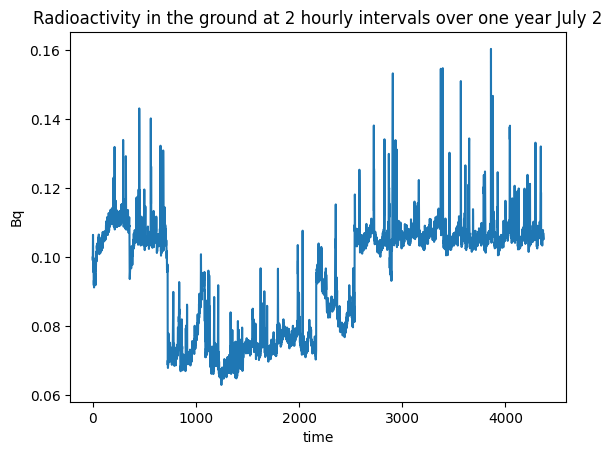

In [14]:
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.xlabel(xlabel)
    axp.ylabel(ylabel)
    axp.title(title1)

plot_assignation(plt, data["dose_rate"], 'time', 'Bq','Radioactivity in the ground at 2 hourly intervals over one year July 2')

plt.show()

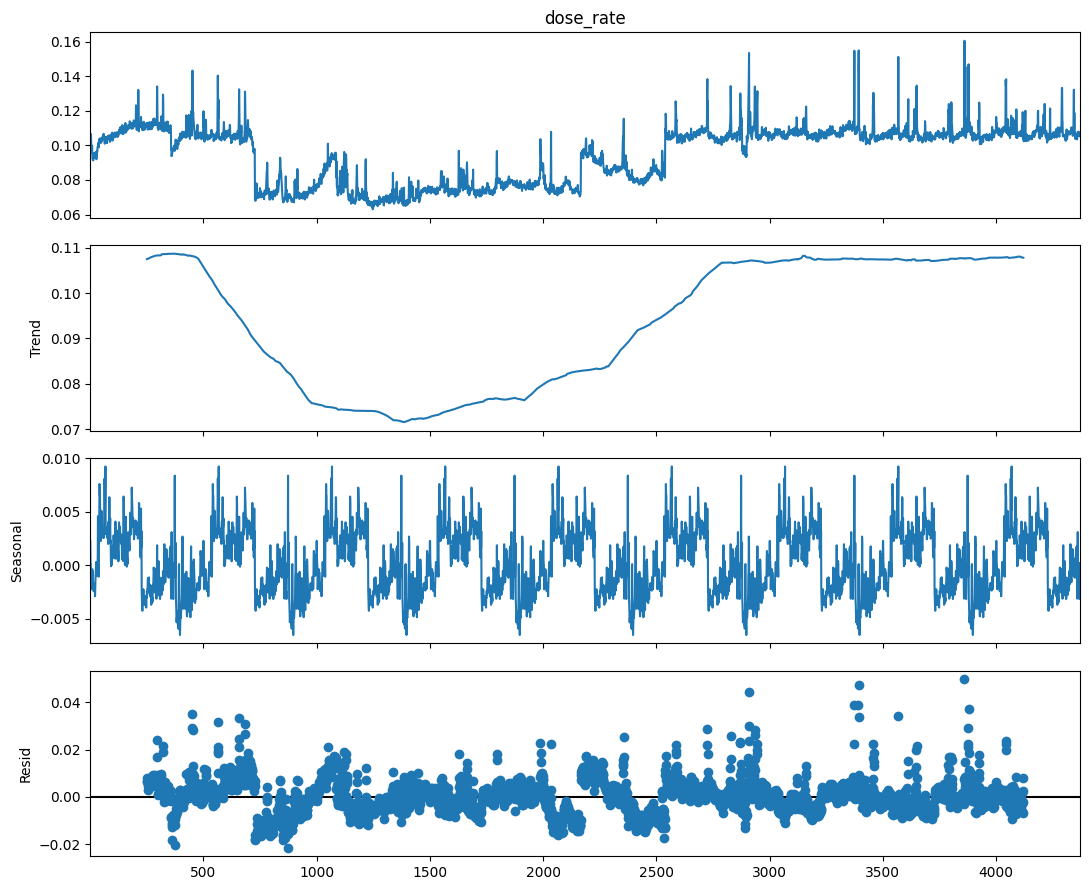

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(data["dose_rate"], period=500)
decompose.plot()

plt.show()

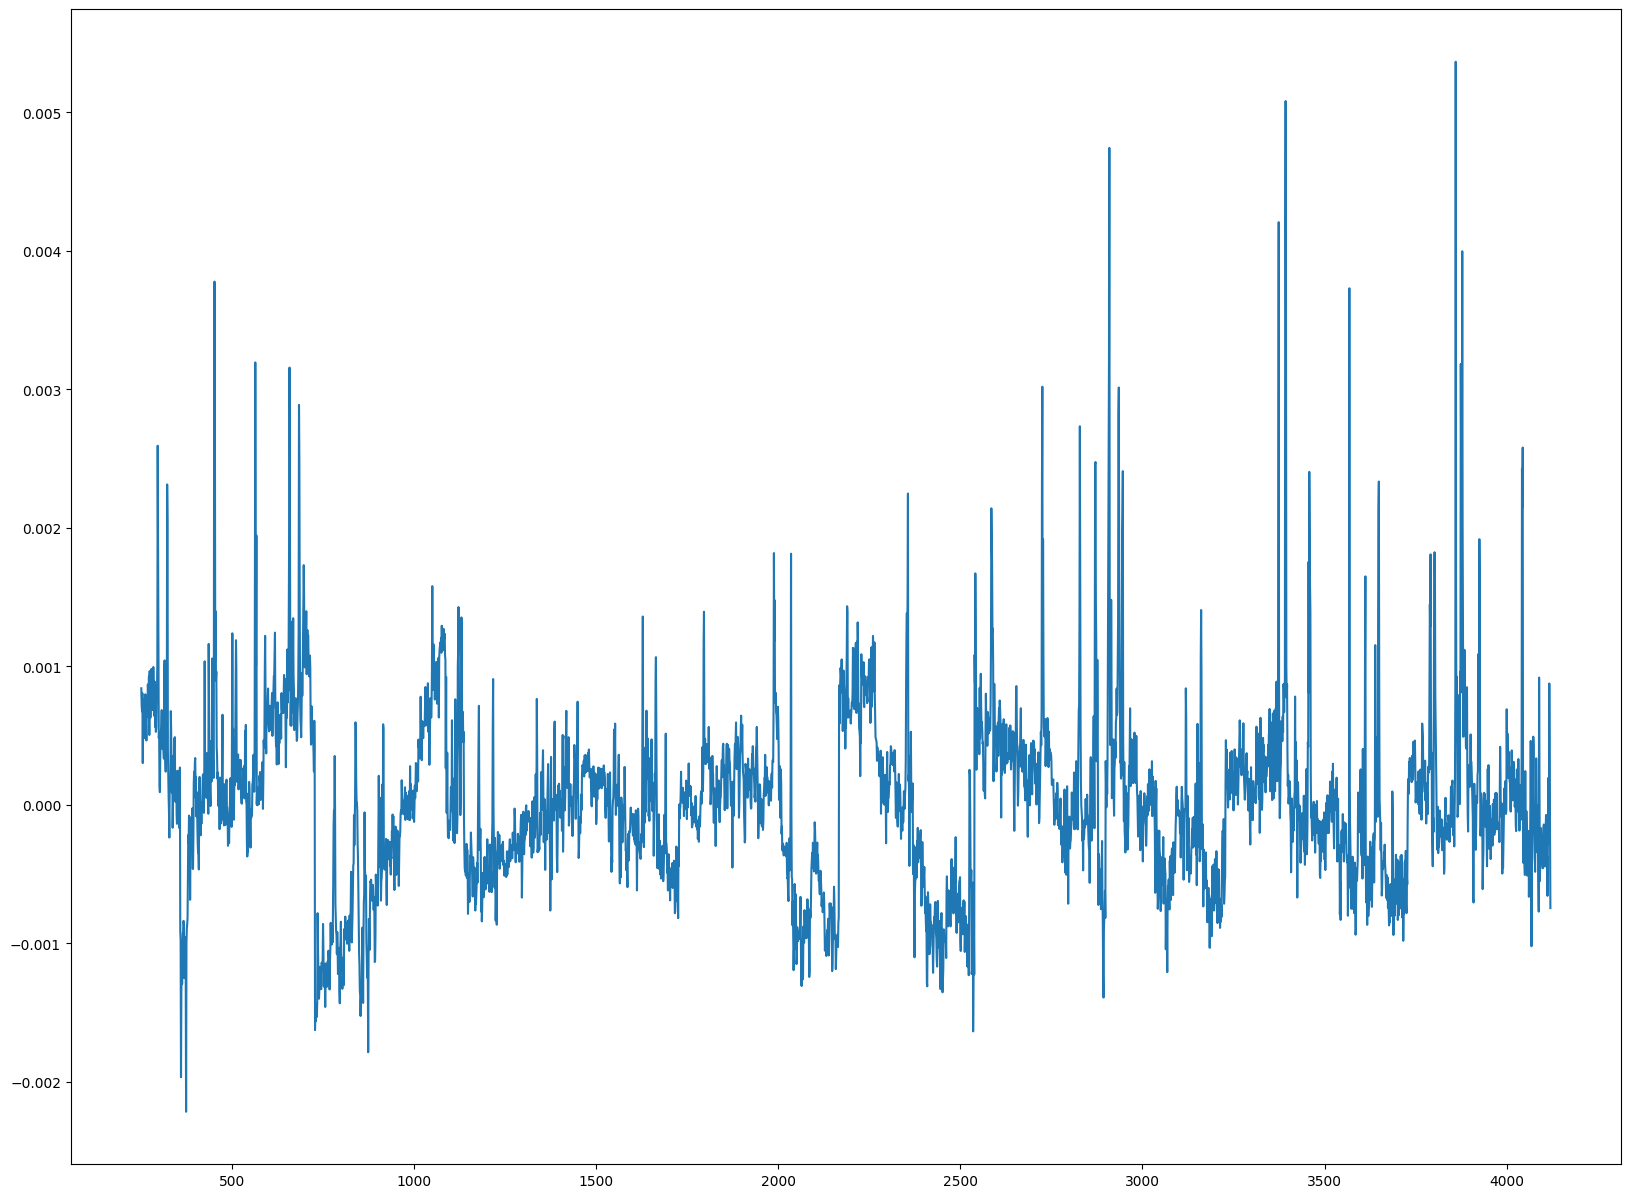

In [23]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))
 
plt.plot(new_ps)
plt.show()

<Axes: >

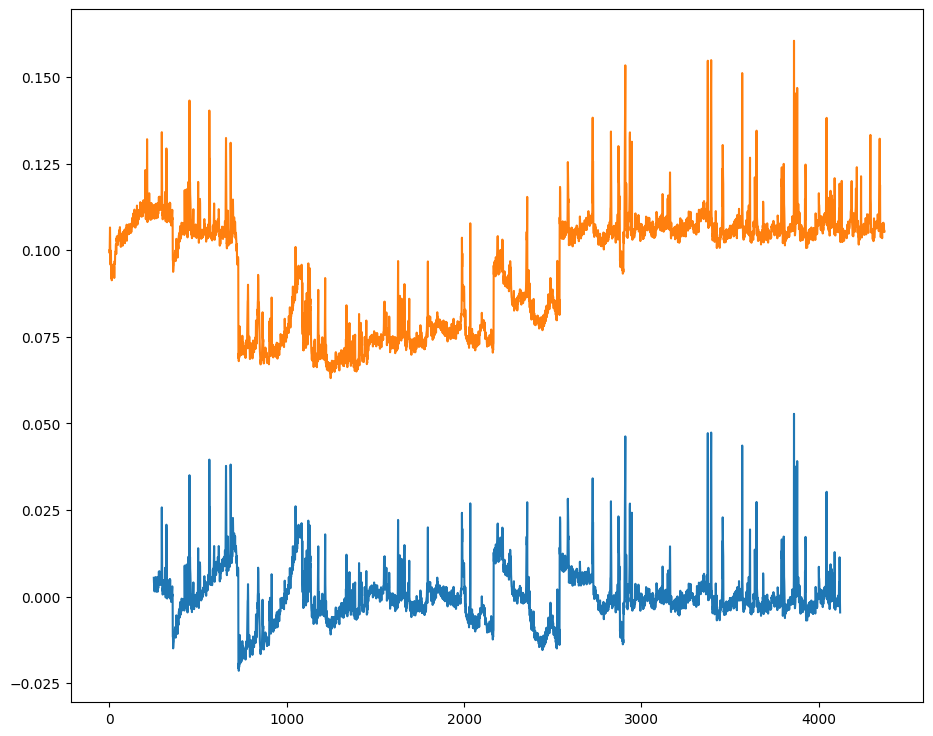

In [24]:
# удаляем компонент тренда из временного ряда...
data_r = data["dose_rate"] - decompose.trend
# ...и отрисовываем обработанный и исходный ряды
data_r.plot()
data["dose_rate"].plot()